In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import pickle

from src.network_simulator import PoissonNetwork
from src.variational_bayes import VariationalBayes

In [2]:
num_nodes = 250; num_groups = 2; T_max = 2
group_sizes = np.array([150, 100])
# lam_matrix = np.array([[2, 0.2, 3.0],
#                        [0.3, 8.0, 6.0],
#                        [2.0, 7.0, 25.0]])
# num_nodes = 1000; num_groups = 4; T_max = 10
# group_sizes = np.array([200, 300, 300, 200])
# lam_matrix = np.array([[2, 0.2, 3.0, 15],
#                        [0.3, 8.0, 6.0, 12],
#                        [2.0, 7.0, 25.0, 14],
#                        [13, 11, 12, 100]])

# group_sizes = [np.array([300, 200]),
#                np.array([500, 0]),
#                np.array([200, 300])]

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])
rho_matrix = np.array([[1., 1.],
                       [1., 1.]])
# rate_matrices = [
#     lam_matrix,
#     np.array([[5, 1.0],
#               [0.3, 8.0]]),
#     np.array([[3, 1.0],
#               [0.3, 8]])]

PN = PoissonNetwork(num_nodes, num_groups, T_max,
                    lam_matrix=lam_matrix,
                    rho_matrix=rho_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes,
                      group_num_change=False)
)
adj_mat = PN.adjacency_matrix

In [3]:
int_length = 0.1; 
delta_pi = 1; delta_rho = 1; delta_lam = 0.1; n_cavi = 3

VB = VariationalBayes(sampled_network=sampled_network, num_groups=2,
                      num_nodes=num_nodes, alpha_0=1., beta_0=1.,
                      sigma_0=1., eta_0=1., zeta_0=1., gamma_0=np.array([0.99, 1.01]),
                      infer_graph_bool=True,
                      T_max=T_max, int_length=int_length)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi)

VB.tau_store[-1,:,:].mean(axis=0)

...Iteration: 1 of 20...
ADAM Iteration: 0
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-01 5.08772391e-01 5.08772391e-01 ... 5.74726659e+03
 5.74726659e+03 5.95250424e+03]
q_flat:[5.08772391e-0

KeyboardInterrupt: 

In [4]:
VB.grad_LB

array([[[nan, nan, nan, ...,  0., nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  0., nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0., nan,  0.],
        [nan, nan, nan, ...,  0., nan, nan]],

       [[nan, nan, nan, ...,  0., nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  0., nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0., nan,  0.],
        [nan, nan, nan, ...,  0., nan, nan]],

       [[nan, nan, nan, ...,  0., nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  0., nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0., nan,  0.],
        [nan, nan, nan, ...,  0., nan, nan]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [3]:
# int_length = 0.1; burn_in = 1

# delta_pi = 1; delta_rho = 0.1; delta_lam = 1; n_cavi = 3
# sigma_0 = np.ones((num_nodes, num_nodes)) * 0.5

# VB = VariationalBayes(sampled_network=sampled_network, 
#                       num_nodes=num_nodes, alpha_0=1, beta_0=1, eta_0=1, 
#                       zeta_0=1, gamma_0 = np.array([0.99, 1.01]), 
#                       sigma_0=sigma_0, infer_graph_bool=True,
#                       num_groups=2, T_max=T_max, int_length=int_length)
# VB.run_full_var_bayes(delta_pi=delta_pi,
#                       delta_rho=delta_rho,
#                       delta_lam=delta_lam,
#                       n_cavi=n_cavi)

# VB.tau_store[-1,:,:].mean(axis=0)

int_length = 0.1; burn_in = 1

delta_pi = 1; delta_rho = 1; delta_lam = 0.1; n_cavi = 3

VB = VariationalBayes(sampled_network=sampled_network, 
                      num_nodes=num_nodes, alpha_0=1, 
                      beta_0=1, gamma_0 = np.array([0.99, 1.01]), 
                      adj_mat=adj_mat, num_groups=2, T_max=T_max, 
                      int_length=int_length)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi)

VB.tau_store[-1,:,:].mean(axis=0)

...Iteration: 1 of 25...
Group proportions: [0.49163645 0.50836355]
Rate matrix: [[2.32640804 2.32227969]
 [2.323444   2.31933857]]
...Iteration: 2 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.25690408 0.48780829]
 [1.12488409 2.02660585]]
...Iteration: 3 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.8387525  0.31760584]
 [1.0086483  2.00961397]]
...Iteration: 4 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.97521004 0.308495  ]
 [1.01975055 1.97716064]]
...Iteration: 5 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.94910738 0.31313453]
 [1.00510996 1.97382631]]
...Iteration: 6 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.97498853 0.29319844]
 [1.00019599 2.00369377]]
...Iteration: 7 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[8.02348125 0.28880484]
 [1.0019546  1.99173058]]
...Iteration: 8 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.96931044 0.29886548]
 [0.98548046 1.97167138]]
...Iteration: 9 of 25...
Group proportions

/home/jc820/Documents/PhD/online_networks/code/online-networks-change-points/src/variational_bayes.py:443: RuntimeWarning: invalid value encountered in scalar divide
  np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD
/home/jc820/Documents/PhD/online_networks/code/online-networks-change-points/src/variational_bayes.py:443: RuntimeWarning: divide by zero encountered in scalar divide
  np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD


Group proportions: [0.4 0.6]
Rate matrix: [[8.05252068 0.30435254]
 [0.99682834 2.00510939]]
...Iteration: 14 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[8.00771689 0.30747025]
 [0.99216783 2.01173836]]
...Iteration: 15 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.98084958 0.29683203]
 [1.00880178 1.99955845]]
...Iteration: 16 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.96391662 0.2983182 ]
 [1.00506518 4.72472842]]
...Iteration: 17 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[8.02983639 0.29561682]
 [0.99734152 5.00928555]]
...Iteration: 18 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[8.04389067 0.29999668]
 [1.00046915 4.97212254]]
...Iteration: 19 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.90441671 0.29443467]
 [1.00318192 4.97693466]]
...Iteration: 20 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[8.0091879  0.30047847]
 [1.01320319 5.01825199]]
...Iteration: 21 of 25...
Group proportions: [0.4 0.6]
Rate matrix: [[7.96

array([0.4, 0.6])

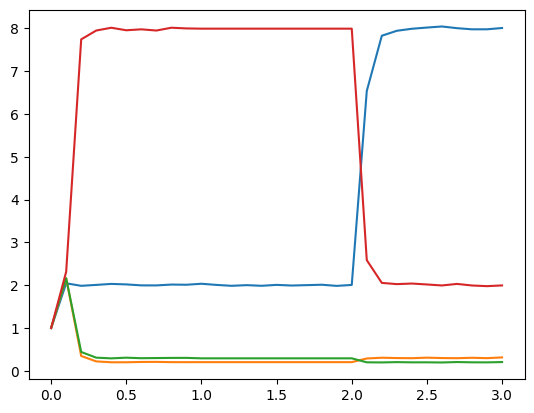

In [38]:
for i in range(2):
    for j in range(2):
        plt.plot(np.arange(0, T_max + int_length, int_length), 
                 [VB.alpha_store[k,i,j]/VB.beta_store[k,i,j] for k in np.arange(0, int(T_max/int_length) + 1)])

# plt.axvline(x=5, linestyle='--', color='black', linewidth=1);
# plt.plot(np.arange(6), [2,2,2,2,2,2], linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [8] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [2] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [1] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [0.3] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.savefig("group_creation.pdf")

In [3]:
int_length = 0.1

# sigma_init = np.random.uniform(0,1,num_nodes ** 2).reshape((num_nodes,num_nodes))
param_prior = np.array([1] * num_groups ** 2).reshape((num_groups, num_groups))

delta_pi = 1; delta_rho = 1; delta_lam = 0.1; n_cavi = 2

VB = VariationalBayes(sampled_network=sampled_network, 
                      num_nodes=num_nodes, 
                      num_groups=num_groups, 
                      alpha_0=1, 
                      beta_0=1,
                      gamma_0 = np.array([0.99, 1.01]),
                      int_length=int_length,
                      T_max=T_max,
                      adj_mat=adj_mat)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi,
                      cp_kl_lag_steps=2,
                      cp_burn_steps=5,
                      cp_stationary_steps=10,
                      cp_kl_thresh=100,
                      cp_rate_wait=0,
                      ARLO_bool=True)

VB.tau_store[-1,:,:].mean(axis=0)

...Iteration: 1 of 250...
...Iteration: 2 of 250...
...Iteration: 3 of 250...
...Iteration: 4 of 250...
...Iteration: 5 of 250...
...Iteration: 6 of 250...
...Iteration: 7 of 250...
...Iteration: 8 of 250...


/home/jc820/Documents/PhD/online_networks/code/online-networks-change-points/src/variational_bayes.py:447: RuntimeWarning: invalid value encountered in scalar divide
  np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD
/home/jc820/Documents/PhD/online_networks/code/online-networks-change-points/src/variational_bayes.py:447: RuntimeWarning: divide by zero encountered in scalar divide
  np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD


...Iteration: 9 of 250...
...Iteration: 10 of 250...
...Iteration: 11 of 250...
...Iteration: 12 of 250...
...Iteration: 13 of 250...
...Iteration: 14 of 250...
...Iteration: 15 of 250...
...Iteration: 16 of 250...
...Iteration: 17 of 250...
...Iteration: 18 of 250...
...Iteration: 19 of 250...
...Iteration: 20 of 250...
...Iteration: 21 of 250...
...Iteration: 22 of 250...
...Iteration: 23 of 250...
...Iteration: 24 of 250...
...Iteration: 25 of 250...
...Iteration: 26 of 250...
...Iteration: 27 of 250...
...Iteration: 28 of 250...
...Iteration: 29 of 250...
...Iteration: 30 of 250...
...Iteration: 31 of 250...
...Iteration: 32 of 250...
...Iteration: 33 of 250...
...Iteration: 34 of 250...
...Iteration: 35 of 250...
...Iteration: 36 of 250...
...Iteration: 37 of 250...
...Iteration: 38 of 250...
...Iteration: 39 of 250...
...Iteration: 40 of 250...
...Iteration: 41 of 250...
...Iteration: 42 of 250...
...Iteration: 43 of 250...
...Iteration: 44 of 250...
...Iteration: 45 of 250...
..

KeyboardInterrupt: 

In [42]:
VB.group_changes_list

[[1.1,
  200,
  array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
         313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
         326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
         339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
         352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
         365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
         378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
         391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
         404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
         417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
         430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
         443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
         456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
         469, 470, 471, 

In [ ]:
rate_matrices = PN.lam_matrices
rate_mat_old = rate_matrices[0]

entry_change = np.zeros((len(rate_change_times), 2))

for cp in range(len(rate_change_times)):
    rate_mat_curr = rate_matrices[cp + 1]
    entry_change[cp,:] = np.argwhere(rate_mat_curr != rate_mat_old)
    rate_mat_old = rate_mat_curr

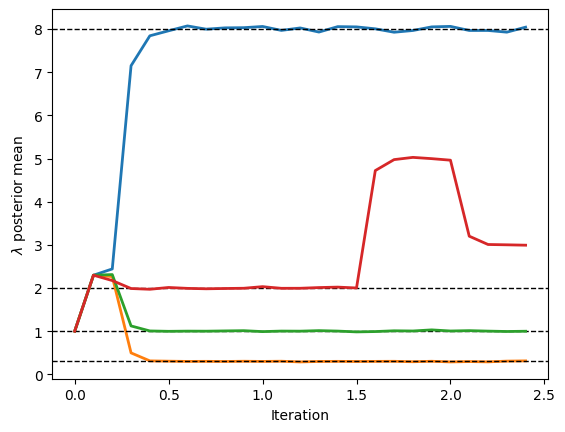

In [6]:
alpha = VB.alpha_store; beta = VB.beta_store
for j in [0,1]:
    for k in [0,1]:
        plt.plot(np.arange(0, T_max, int_length),
                    [alpha[i,j,k] / beta[i,j,k] for i in np.arange(int(T_max/int_length))],
                    linewidth=2)
        plt.axhline(y=lam_matrix[j,k], linestyle='--', color='black', linewidth=1)

# g_out = 1; g_in = 0
# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=rate_change_times[idx], linestyle='--', color='black', linewidth=0.75)
# for cp in rate_change_times:
#     plt.axvline(x=cp, linestyle='--', color='black', linewidth=0.75)

# plt.ylim([0,5.5]);
plt.xlabel('Iteration');
plt.ylabel(r'$\lambda$ posterior mean');
plt.savefig('analyses/local_figures/motivating_rate_change_delta.pdf')

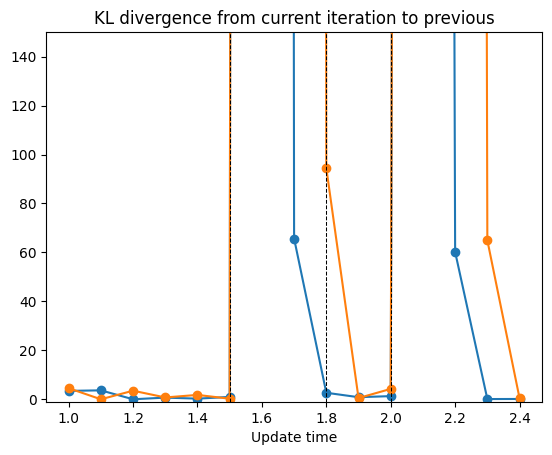

In [18]:
from scipy.special import gammaln, digamma

def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / a2)

burn_in = 1

g_out = 0; g_in = 0

legend_labels = []
for lag in [1, 2]:
        # Plot the mean of the posteriors for lambda with iteration number
        for j in [1]:
                for k in [1]:
                        kl_vals = np.array([abs(kl(alpha[i,j,k], alpha[i - lag,j,k],
                                                beta[i,j,k], beta[i - lag,j,k]))
                                                for i in np.arange(int(burn_in/int_length), int(T_max/int_length), 1)])
                        plt.plot(np.arange(burn_in, T_max, int_length),
                                kl_vals, marker='o')

# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=rate_change_times[idx], linestyle='--', color='black', linewidth=0.75)

for cp in [1.5,2]:
       plt.axvline(x=cp, linestyle='--', color='black', linewidth=0.75)

plt.axvline([1.8], linestyle='--', color='black', linewidth=0.75)

plt.ylim([-1,150])

# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=[1.5,2][idx], linestyle='--', 
#                    color='red', linewidth=0.75)

# plt.ylim([0,800])
# plt.legend(legend_labels, title='Lag')
plt.xlabel("Update time")
plt.title("KL divergence from current iteration to previous");

In [22]:
VB.group_changes_list

[[1.1, 0, array([], dtype=int64)],
 [1.2000000000000002, 0, array([], dtype=int64)],
 [1.3000000000000003, 0, array([], dtype=int64)],
 [1.4000000000000001, 0, array([], dtype=int64)],
 [1.5000000000000002, 0, array([], dtype=int64)],
 [1.6, 0, array([], dtype=int64)],
 [1.7000000000000002, 0, array([], dtype=int64)],
 [1.8000000000000003, 0, array([], dtype=int64)],
 [1.9000000000000001, 0, array([], dtype=int64)],
 [2.0, 0, array([], dtype=int64)],
 [2.1,
  119,
  array([  0,  15,  22,  23,  32,  33,  38,  48,  53,  58,  63,  68,  69,
          85,  95, 109, 117, 132, 143, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
         183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
         196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
         209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
         222,

In [23]:
np.median(kl_vals[:15]) * 25

105.88700386435903

In [14]:
max_lag = 2
a = np.array([1,2,3,4,5,6,7,8,9,10])
a1 = a[max_lag:]; a2 = a[(max_lag - 1):-1]
kl_lag = a1 ** 2 + a2 ** 2

8

In [18]:
print(a1, a2, kl_lag)

[ 3  4  5  6  7  8  9 10] [2 3 4 5 6 7 8 9] [ 13  25  41  61  85 113 145 181]


In [21]:
a[max_lag:-1]

array([3, 4, 5, 6, 7, 8, 9])

In [19]:
from scipy.stats import median_abs_deviation
from scipy.special import gammaln, digamma


def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / b1
            )

def kl_vector(alpha, beta, lag, max_lag):
    """
    Parameters:
        - alpha, beta: numpy arrays of all inferred values
    """
    lag += 1
    alpha_1 = alpha[max_lag:]; alpha_2 = alpha[(max_lag - lag):-lag]
    beta_1 = beta[max_lag:]; beta_2 = beta[(max_lag - lag):-lag]
    kl_lag = (
        alpha_2 * np.log(beta_1 / beta_2) - 
        gammaln(alpha_1) + gammaln(alpha_2) +
        (alpha_1 - alpha_2) * digamma(alpha_1) -
        (beta_1 - beta_2) * alpha_1 / alpha_2
    )
    
    return kl_lag

# max_lag = 10
# fig, axs = plt.subplots(max_lag, 1, figsize=(8, 10))

# time = np.arange(T_max, int_length)
# for lag in range(max_lag):
#     kl_lag = kl_vector(alpha[init_burn:], beta[init_burn:], lag, max_lag)
#     axs[lag].plot(np.arange(init_burn * int_length + max_lag * int_length, T_max + int_length, int_length), 
#              kl_lag[:,1,0], marker='o')
#     axs[lag].set_xticks(np.arange(init_burn * int_length + lag * int_length, T_max + int_length, int_length))
#     axs[lag].set_xticklabels('')

# for lag in [1]:
#     # Plot the mean of the posteriors for lambda with iteration number
#     for j in [0]:
#             for k in [0]:
#                     kl_vals = np.array([abs(kl(alpha[i-lag,j,k], alpha[i,j,k],
#                                             beta[i-lag,j,k], beta[i,j,k]))
#                                             for i in np.arange(int(burn_in/int_length), int(T_max/int_length), 1)])

# time = np.arange(1, T_max, int_length)
# for i in range(2, len(kl_vals)):
#     mad_val = MAD_outlier_detector(kl_vals[:i], 100)
#     if mad_val:
#         print(time[i])
    
def MAD_KL_outlier_detector(alpha, beta, max_lag, cutoff):
    """
    The function takes data contains all points up to and including
    the current update time, assuming that the burn-in points aren't 
    included. 
    """
    ## Compute the KL-divergences off all lags up to current lag
    kl_lag_list = list()
    kl_curr_datum_list = list()
    for lag in range(1, max_lag + 1):
        alpha_1 = alpha[max_lag:]; alpha_2 = alpha[(max_lag - lag):-lag]
        beta_1 = beta[max_lag:]; beta_2 = beta[(max_lag - lag):-lag]
        kl_lag = (
            alpha_2 * np.log(beta_1 / beta_2) - 
            gammaln(alpha_1) + gammaln(alpha_2) +
            (alpha_1 - alpha_2) * digamma(alpha_1) -
            (beta_1 - beta_2) * alpha_1 / beta_1
        )
        kl_curr_datum_list.append(kl_lag[-1])
        kl_lag_list.append(kl_lag[:-1])
    kl_curr_datum = np.array(kl_curr_datum_list)
    kl_lag = np.concatenate(kl_lag_list)

    ## Compute the current MAD and the deviation of the current datum
    # Current MAD (excluding current datum)
    curr_MAD = median_abs_deviation(kl_lag)
    # Deviation of current datum (for each lag up to max_lag)
    MAD_deviation_lags = []
    for i in range(max_lag):
        MAD_deviation_lags.append(
            np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD
            )
    # Flag as a change point if all lags are greater than the cutoff
    if np.all(np.array(MAD_deviation_lags) > cutoff):
        return 1
    else: 
        return 0

init_burn = 5; max_lag = 2; cut_off = 10; B = 0.5
num_flagged = 0
for k in [0, 1]:
    for m in [0, 1]:
        previous_change_time = 0
        for i in np.arange(int(T_max/int_length)):
            if i > (init_burn + max_lag):
                cp_flag = MAD_KL_outlier_detector(
                    alpha[init_burn:i, k, m], alpha[init_burn:i, k, m], max_lag, cut_off
                    )
                if cp_flag:
                    latest_change_time = (i + init_burn) * int_length
                    if latest_change_time - previous_change_time > B:
                        print(f"{k} -> {m}: {latest_change_time}")
                        previous_change_time = latest_change_time
                        num_flagged += 1
print(f"Number flagged: {num_flagged}")


0 -> 0: 3.6
0 -> 0: 7.7
0 -> 1: 3.2
0 -> 1: 5.7
0 -> 1: 9.9
1 -> 0: 2.7
1 -> 0: 4.2
1 -> 0: 4.9
1 -> 0: 5.5
1 -> 0: 6.4
1 -> 0: 7.2
1 -> 0: 9.3
1 -> 1: 1.6
1 -> 1: 8.200000000000001
1 -> 1: 8.8
Number flagged: 15


/home/jc820/Documents/PhD/online_networks/code/online_networks_venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jc820/Documents/PhD/online_networks/code/online_networks_venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [20]:
rate_change_times

array([2.02097816, 2.5087728 , 2.92178991, 3.49896361, 4.21789113,
       4.66713494, 5.07956667, 5.74000013, 6.49396539, 7.04821382,
       7.53984299, 8.06232152, 8.66883722, 9.22938238, 9.95675722])

In [21]:
VB.rate_changes_list

[[1.5000000000000002, 1, 1],
 [2.2, 1, 0],
 [2.7, 0, 1],
 [3.2, 0, 0],
 [3.7, 1, 0],
 [4.3999999999999995, 1, 0],
 [4.8, 1, 0],
 [5.2, 0, 1],
 [5.9, 1, 0],
 [6.7, 1, 0],
 [7.2, 0, 0],
 [7.7, 1, 1],
 [8.2, 1, 1],
 [8.8, 1, 0],
 [9.4, 0, 1],
 [9.9, 0, 1]]

In [22]:
rate_change_times

array([2.02097816, 2.5087728 , 2.92178991, 3.49896361, 4.21789113,
       4.66713494, 5.07956667, 5.74000013, 6.49396539, 7.04821382,
       7.53984299, 8.06232152, 8.66883722, 9.22938238, 9.95675722])

In [23]:
alpha_burned / beta_burned

NameError: name 'alpha_burned' is not defined

In [ ]:
entry_change

array([[1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
rate_change_times

array([1.41155789, 2.1202344 , 2.84526727, 3.88244234, 5.43757038,
       6.67553168, 7.7050442 , 8.34504945, 9.24889155, 9.92585295])

In [ ]:
PN.lam_matrices

[array([[2. , 1. ],
        [0.3, 8. ]]),
 array([[2.        , 1.        ],
        [0.3       , 6.50131579]]),
 array([[2.        , 1.        ],
        [3.30635604, 6.50131579]]),
 array([[ 2.        ,  1.        ],
        [ 3.30635604, 10.97713969]]),
 array([[ 2.        ,  1.        ],
        [ 3.30635604, 10.58634079]]),
 array([[ 2.        ,  1.        ],
        [ 2.17156353, 10.58634079]]),
 array([[ 2.        ,  1.        ],
        [ 2.93565764, 10.58634079]]),
 array([[ 2.        ,  1.        ],
        [ 2.93565764, 10.45179954]]),
 array([[2.        , 1.        ],
        [2.93565764, 5.97789915]]),
 array([[2.        , 1.        ],
        [0.15683871, 5.97789915]]),
 array([[2.        , 1.        ],
        [0.57090788, 5.97789915]])]

In [ ]:
from scipy.stats import gamma

x = np.linspace(0,20,1000)
for i in [99]:
    pdf_values = gamma.pdf(x, VB.alpha_store[i][1,1], 
                                    scale=1/VB.beta_store[i][1,1])
    plt.plot(x, pdf_values)
    # pdf_values = gamma.pdf(x, VB.alpha_store[i][1,1], 
    #                                 scale=1/VB.beta_store[i][1,1])
    # plt.plot(x, pdf_values)

In [ ]:
nu_prior = np.ones((10,))
tau = np.random.random((500,10))
num_var_groups = 10

omega = tau.sum(axis=0) + 1
        
## Compute nu using vectorisaion to avoid for loops
# Create a mask to select appropriate elements tau
mask = np.triu(np.ones((num_nodes, num_var_groups), dtype=bool), k=1)

# Sum along the appropriate axes
sum_tau = np.sum(tau[:, np.newaxis, :] * mask[np.newaxis, :, :], axis=(0,1))

# Compute the final result
nu = sum_tau + nu_prior
nu

array([1.00000000e+00, 2.41214764e+02, 4.93405815e+02, 7.80562161e+02,
       9.85896294e+02, 1.26970676e+03, 1.54342550e+03, 1.77257165e+03,
       1.95876657e+03, 2.28966591e+03])

In [ ]:
import time

num_var_groups = 10
tau = np.random.random((500, 10))
nu_prior = np.ones((10,))

start = time.time() 
sum_term = np.zeros((num_nodes,))
nu = np.zeros((num_var_groups,))
for j in range(num_var_groups):
    sum_term[:] = tau[:, (j+1):].sum(axis=1) 
    nu[j] = sum_term.sum() + nu_prior[j]

end = time.time()

print(f"Time: {end - start}")

print(nu)

start = time.time()

sum_term = np.zeros((num_nodes, ))
nu = np.zeros((num_var_groups, ))
for j in range(num_var_groups):
    for i in range(num_nodes):
        sum_term[i] = tau[i,(j+1):].sum() 
    nu[j] = sum_term.sum() + nu_prior[j]

end = time.time()

print(f"Time: {end - start}")

print(nu)

Time: 0.0015175342559814453
[2.24812213e+03 1.99951894e+03 1.74311741e+03 1.49273405e+03
 1.25613738e+03 1.00108767e+03 7.51002240e+02 4.97780484e+02
 2.56828106e+02 1.00000000e+00]
Time: 0.02824115753173828
[2.24812213e+03 1.99951894e+03 1.74311741e+03 1.49273405e+03
 1.25613738e+03 1.00108767e+03 7.51002240e+02 4.97780484e+02
 2.56828106e+02 1.00000000e+00]


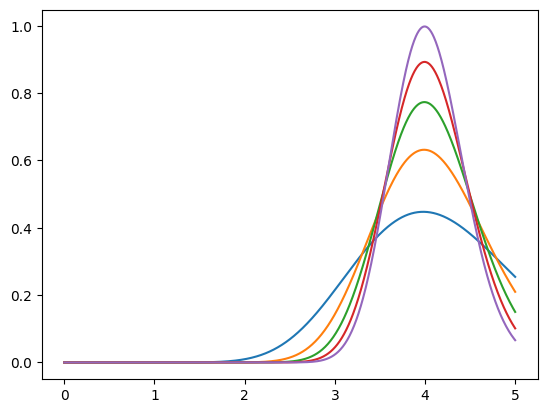

In [ ]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Parameters for the gamma distribution
shape = 2
scale = 4 / shape

# Range of x values
x = np.linspace(0, 5, 1000)

power = 0.1

for i in range(5):
    shape += 200
    scale = 4 / shape
    gamma_dist = gamma(power * (shape - 1) + 1, 
                    scale=scale/power)
    pdf_values = gamma_dist.pdf(x)

    # np.savetxt(f'gamma_pdf_2_7.csv', np.column_stack([x, pdf_values]))

    # Plot the result
    plt.plot(x, pdf_values)
plt.show()


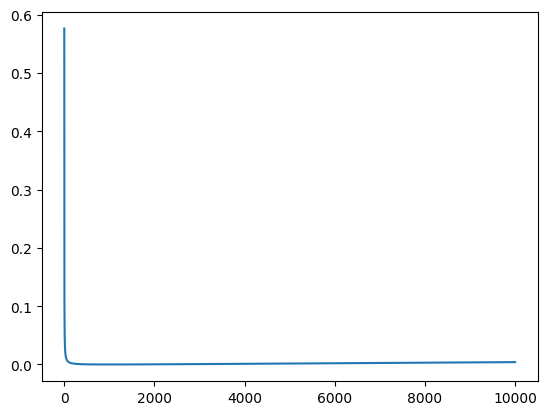

In [ ]:
from scipy.special import gammaln, digamma
import matplotlib.pyplot as plt
import numpy as np

def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / b1)

a = 1000; eps1 = 1; eps2 = 1
plt.plot(np.arange(1,10000,1), [kl(b, b + eps1, a, a + eps2) for b in np.arange(1,10000,1)]);

In [89]:
num_nodes = 250; num_groups = 2; T_max = 1
# group_sizes = np.array([100, 250, 150])
# lam_matrix = np.array([[2, 0.2, 3.0],
#                        [0.3, 8.0, 6.0],
#                        [2.0, 7.0, 25.0]])
# num_nodes = 1000; num_groups = 4; T_max = 10
# group_sizes = np.array([200, 300, 300, 200])
# lam_matrix = np.array([[2, 0.2, 3.0, 15],
#                        [0.3, 8.0, 6.0, 12],
#                        [2.0, 7.0, 25.0, 14],
#                        [13, 11, 12, 100]])

group_sizes = np.array([240, 10])

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])
rho_matrix = np.array([[0.9, 0.9],
                      [0.9, 0.9]])

rate_matrices = [
    lam_matrix,
    np.array([[5, 1.0],
              [0.3, 8.0]]),
    np.array([[3, 1.0],
              [0.3, 8]])]

PN = PoissonNetwork(num_nodes, num_groups, T_max, lam_matrix=lam_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes)
)
adj_mat = PN.adjacency_matrix

In [6]:
num_nodes = 250; num_groups = 2; T_max = 10

group_sizes = np.array([248, 2])

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])

PN = PoissonNetwork(num_nodes, num_groups, T_max, lam_matrix=lam_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes)
)
adj_mat = PN.adjacency_matrix

def compute_eff_count(update_time, num_nodes, sampled_network):
    """
    A method to compute the effective count on each edge. This is simply 
    the number of observations on an edge from update_time - int_length to
    update_time. Parameters:
        - update_time: time at which we run the update.  
    """
    eff_count = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if sampled_network[i][j] is not None:
                np_edge = np.array(
                    sampled_network[i][j]
                )
                eff_count[i,j] = (
                    len(
                        np_edge[(np_edge < update_time)]
                    )
                )
    return eff_count

eff_count = compute_eff_count(T_max, num_nodes, sampled_network)

tau = np.zeros((num_nodes, num_groups))
# tau[:group_sizes[0],0] = 1; tau[group_sizes[0]:,1] = 1
tau[0:-2,0] = 1; tau[-2:,1] = 0.15; tau[-2:,0] = 1 - tau[-2:,1]

beta = np.array([[1,1], [1,1]]); alpha = np.array([[1,1], [1,1]])
Delta = T_max; delta = 0.1
sigma = np.ones((num_nodes, num_nodes))
np.fill_diagonal(sigma, 0)

for i in range(1000):
    # delta = 1 - Delta * (tau.T @ tau)[k,m] / (beta * 500)
    alpha = delta * (alpha - 1) + (tau.T @ eff_count @ tau) + 1
    beta = (delta * beta + Delta * tau.T @ sigma @ tau)
    # print(f"alpha: {np.round(alpha,3)}, beta: {np.round(beta,3)}, mean: {np.round(alpha/beta,3)}")
print(f"""
      lam00: {round(alpha[0,0]/beta[0,0], 1)}, 
      lam01: {round(alpha[0,1]/beta[0,1], 1)},
      lam10: {round(alpha[1,0]/beta[1,0], 1)},
      lam11: {round(alpha[1,1]/beta[1,1], 1)}
""")



      lam00: 2.0, 
      lam01: 1.0,
      lam10: 0.3,
      lam11: 10.6



In [233]:
wh = np.array([[0.01, 0.5],
                        [0.04, 1]]) < 0.1
ind_wh = np.where(wh)
a = np.array([[1,2],[3,4]])
a[~wh] = 10
a

array([[ 1, 10],
       [ 3, 10]])

In [175]:
tau = np.zeros((num_nodes, num_groups))
tau[0:-2,0] = 1; tau[-2:,0] = 0; tau[-2:,1] = 1 - tau[-2:,0]
tau

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [88]:
import numpy as np


# def generate_random_array(N, K, target_sum):
#     # Generate random array
#     rand_array = np.random.rand(N, K)
    
#     # Normalize each row to have the target sum
#     normalized_array = rand_array / rand_array.sum(axis=1, keepdims=True) * target_sum
    
#     return normalized_array

# low_col = 0.1; k = 0; m = 0
# tau = np.hstack((np.full((500,1), low_col), generate_random_array(500, 2, 1 - low_col)))
# tau = np.zeros
# tau = np.zeros((500, 2), dtype=int)
# indices = np.random.randint(0, 2, size=500)
# for i, idx in enumerate(indices):
#     tau[i, idx] = 1

beta = 10; alpha = 20
Delta = 10
poisson_matrix = np.random.poisson(Delta * alpha / beta, size=(500, 500))

tau = np.zeros((500,2)); n = 10
tau[:n,0] = 1; tau[:n,1] = 1 - tau[:n,0]; tau[n:,1] = 1

k = 0; m = 0; delta = 0.1
for i in range(10):
    # delta = 1 - Delta * (tau.T @ tau)[k,m] / (beta * 500)
    alpha = delta * (alpha - 1) + (tau.T @ poisson_matrix @ tau) + 1
    beta = (delta * beta + Delta * tau.T @ tau)
    # print(f"alpha: {np.round(alpha,3)}, beta: {np.round(beta,3)}, mean: {np.round(alpha/beta,3)}")
    print(f"mean: {np.round(alpha/beta,1)}")


mean: [[2.06000e+01 9.77349e+04]
 [9.78129e+04 9.79900e+02]]
mean: [[2.0800000e+01 1.0750639e+06]
 [1.0759219e+06 9.8010000e+02]]
mean: [[2.08000000e+01 1.08483539e+07]
 [1.08570119e+07 9.80100000e+02]]
mean: [[2.08000000e+01 1.08581254e+08]
 [1.08667912e+08 9.80100000e+02]]
mean: [[2.08000000e+01 1.08591025e+09]
 [1.08677691e+09 9.80100000e+02]]
mean: [[2.08000000e+01 1.08592003e+10]
 [1.08678669e+10 9.80100000e+02]]
mean: [[2.08000000e+01 1.08592100e+11]
 [1.08678767e+11 9.80100000e+02]]
mean: [[2.08000000e+01 1.08592110e+12]
 [1.08678777e+12 9.80100000e+02]]
mean: [[2.08000000e+01 1.08592111e+13]
 [1.08678778e+13 9.80100000e+02]]
mean: [[2.08000000e+01 1.08592111e+14]
 [1.08678778e+14 9.80100000e+02]]


In [22]:
delta_lam = np.array([[1,2],[3,4]], dtype=float)
# Adjust delta matrix for empty groups
empty_groups_bool = tau.T @ sigma @ tau < 0.1
empty_groups_ind = np.where(empty_groups_bool)
# delta_lam[empty_groups_bool] = 1
delta_lam[~empty_groups_bool] = 0.1
delta_lam

array([[0.1, 0.1],
       [0.1, 4. ]])

In [20]:
~empty_groups_bool

array([[ True,  True],
       [ True, False]])